In [2]:
import numpy as np 
import pandas as pd 
import os
import datetime
from datetime import datetime
from pandas_datareader import data
from functools import reduce
import yoptions as yo
from yahoo_fin import options
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from tabulate import tabulate

In [11]:
today = datetime.now()
year_ago = datetime(today.year-4, today.month, today.day)

In [12]:
year_ago, today

(datetime.datetime(2019, 5, 24, 0, 0),
 datetime.datetime(2023, 5, 24, 13, 44, 52, 281174))

In [13]:
#data.DataReader?

In [14]:
import yfinance as yfin

In [15]:
yfin.pdr_override()

In [16]:
tickers = ['GOOG', 'AMZN', 'AMD', 'META', 'INTC', 'AAPL', 'NVDA', 'MSFT']

dfs = []

for ticker in tickers:
    temp = data.get_data_yahoo(ticker, year_ago, today)
    temp['Date'] = temp.index
    temp.index = range(temp.shape[0])
    temp_new = temp[['Date', 'Adj Close']]
    temp_new.columns = ['Date', ticker]
    dfs.append(temp_new)
    
stocks = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs) # create common table of stocks
print(stocks.shape)
stocks.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(1007, 9)


,Date,GOOG,AMZN,AMD,META,INTC,AAPL,NVDA,MSFT
0,2019-05-24,56.673500,91.164001,26.440001,181.059998,39.629044,43.410179,36.052608,121.336342
1,2019-05-28,56.707500,91.821503,29.049999,184.309998,38.739895,43.230694,35.600563,121.259453
2,2019-05-29,55.823002,90.959503,28.090000,182.190002,39.326733,43.024525,34.857903,120.086861
3,2019-05-30,55.897499,90.816002,28.030001,183.009995,39.771301,43.247677,34.591820,120.846146
4,2019-05-31,55.181499,88.753502,27.410000,177.470001,39.157803,42.464222,33.684196,118.875786


In [17]:
options_call, options_put = {}, {} 
drop_ticker = []
params = ['Strike', 'Last Price', 'Bid', 'Ask', 'Impl. Volatility', 'Delta', 'Gamma', 'Theta', 'Vega', 'Rho']

# download call and put options with greeks parameters
for ticker in tickers:
    try:
        call = yo.get_chain_greeks(stock_ticker=ticker, dividend_yield=0, option_type='c', risk_free_rate=0)[params]
        put = yo.get_chain_greeks(stock_ticker=ticker, dividend_yield=0, option_type='p', risk_free_rate=0)[params]

        options_call[ticker] = call
        options_put[ticker] = put
    except ValueError:
        drop_ticker.append(ticker)

In [18]:
stocks.drop(drop_ticker, axis=1, inplace=True)
for tick in drop_ticker: 
    tickers.remove(tick) # remove stocks without data options

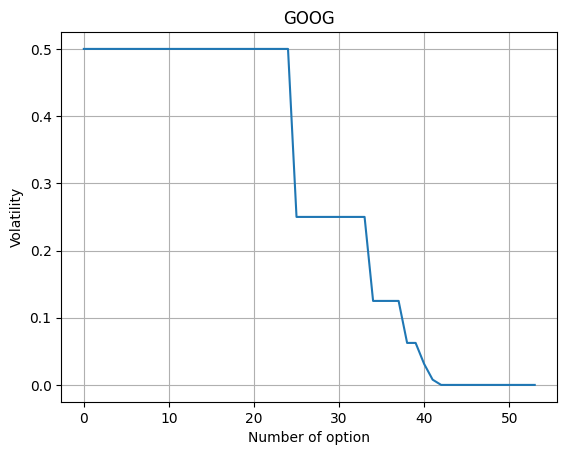

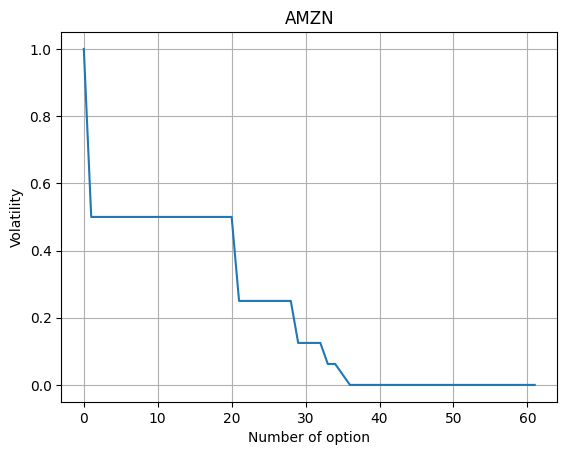

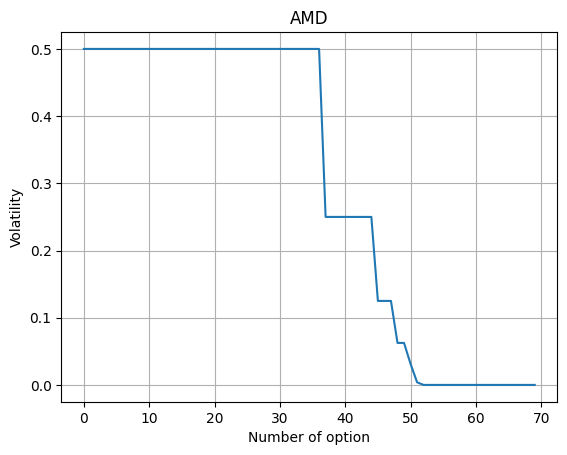

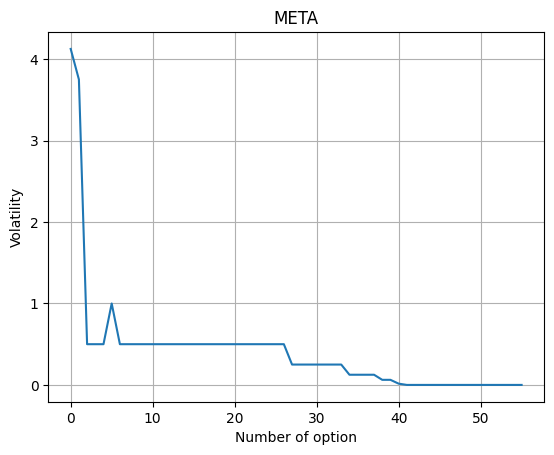

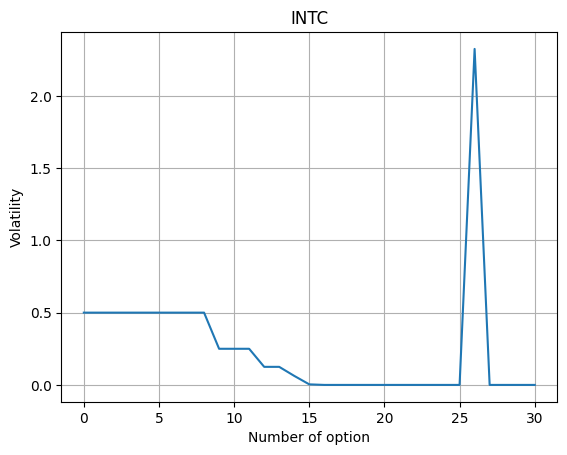

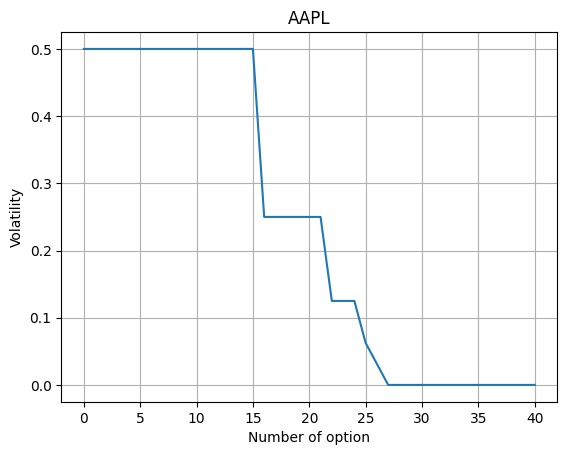

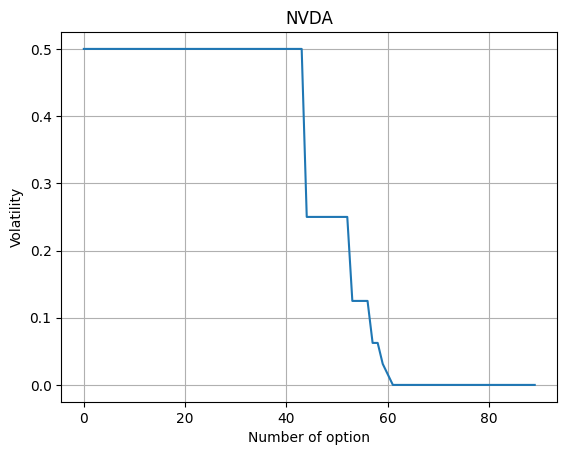

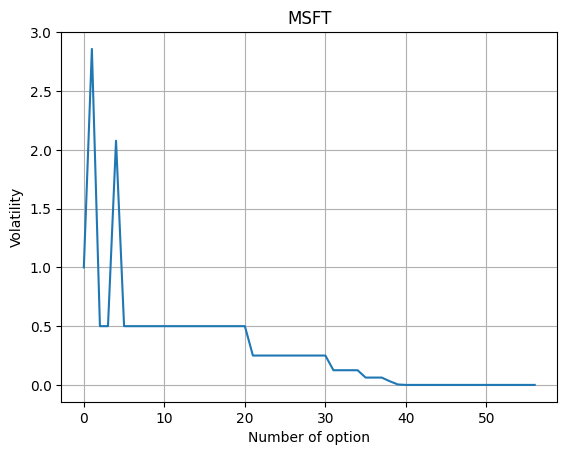

In [19]:
for tick in tickers: # Graphics of implement volatility
    plt.title(tick)
    plt.ylabel('Volatility')
    plt.xlabel('Number of option')
    plt.grid(True)
    plt.plot(range(options_put[tick]['Impl. Volatility'].shape[0]), options_put[tick]['Impl. Volatility'])
    plt.show()

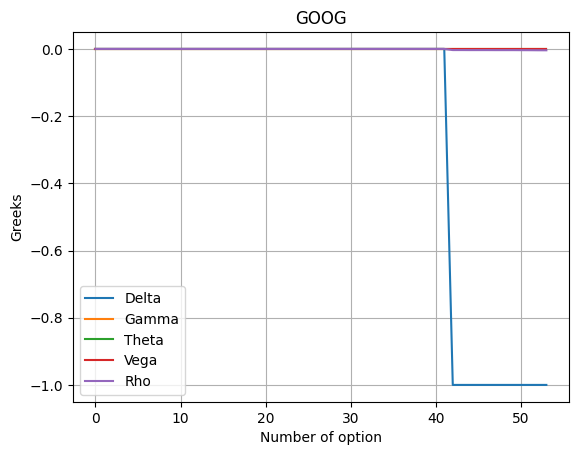

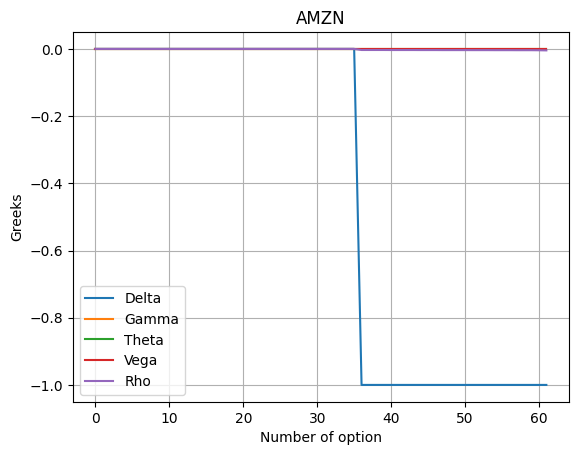

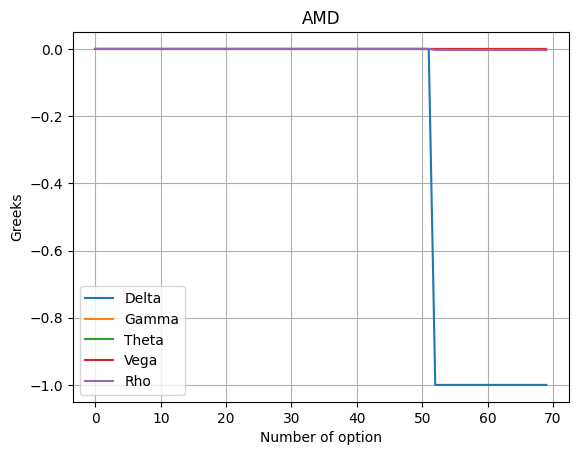

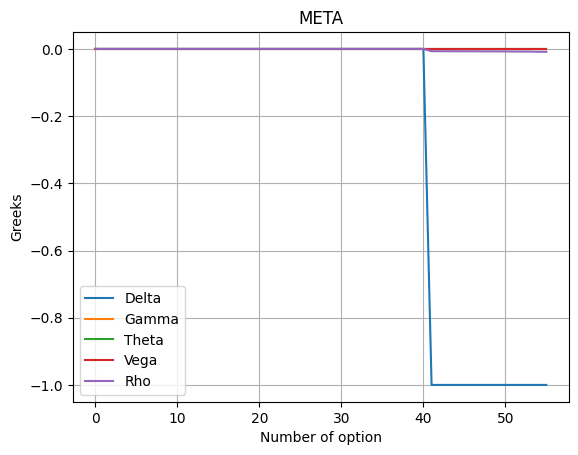

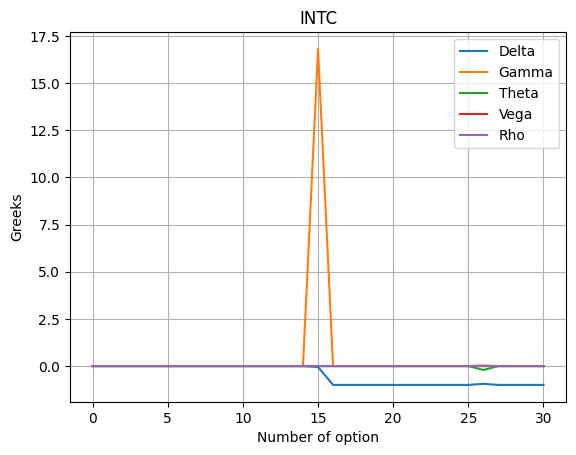

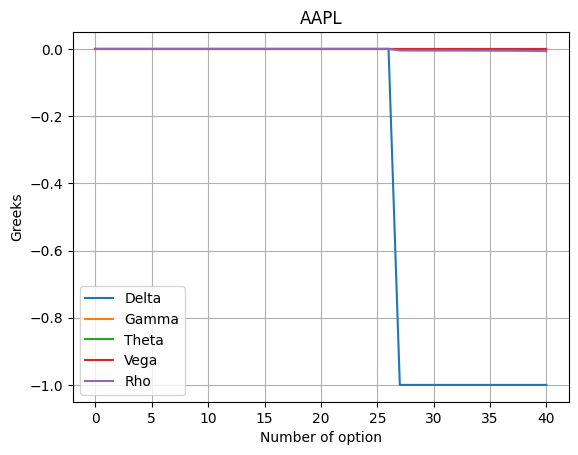

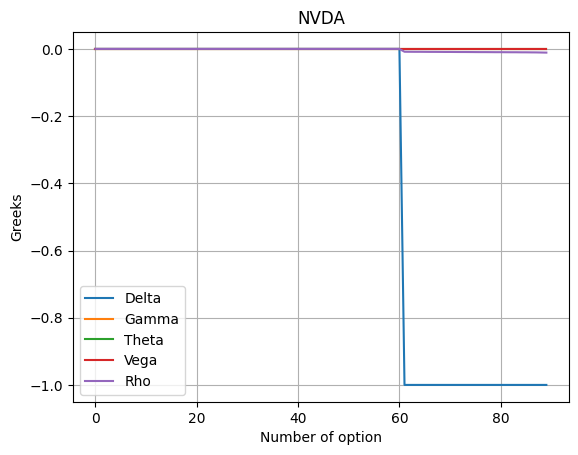

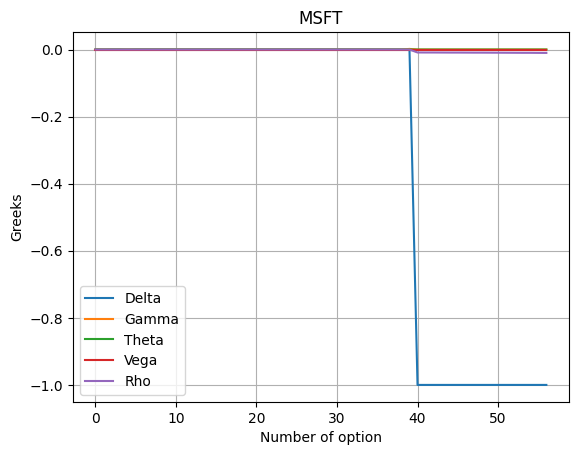

In [20]:
for tick in tickers: # Graphics of greeks
    plt.title(tick)
    plt.ylabel('Greeks')
    plt.xlabel('Number of option')
    plt.grid(True)
    plt.plot(options_put[tick]['Delta'], label='Delta')
    plt.plot(options_put[tick]['Gamma'], label='Gamma')
    plt.plot(options_put[tick]['Theta'], label='Theta')
    plt.plot(options_put[tick]['Vega'], label='Vega')
    plt.plot(options_put[tick]['Rho'], label='Rho')
    plt.legend()
    plt.show()

The portfolio's anticipated return is the total expected return of the securities in it, weighted by their weight in the portfolio.

The basic risk calculation is based on the relationship between the portfolio's shares and the covariance associated with each security in the portfolio.

And the fundamental feature is risk reduction above return maximization.



In [21]:
stocks.drop(['Date'], axis=1, inplace=True)
stock_returns = stocks.pct_change().dropna()

In [22]:
mean_income = stock_returns.mean() # Mean income for each stock
cov_returns = stock_returns.cov() # Covariation 
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

GOOG    0.000990
AMZN    0.000496
AMD     0.001973
META    0.000745
INTC    0.000017
AAPL    0.001596
NVDA    0.002681
MSFT    0.001156
dtype: float64
          GOOG      AMZN       AMD      META      INTC      AAPL      NVDA  \
GOOG  0.000434  0.000322  0.000408  0.000417  0.000292  0.000311  0.000455   
AMZN  0.000322  0.000532  0.000454  0.000418  0.000262  0.000318  0.000487   
AMD   0.000408  0.000454  0.001151  0.000499  0.000440  0.000442  0.000878   
META  0.000417  0.000418  0.000499  0.000857  0.000351  0.000380  0.000553   
INTC  0.000292  0.000262  0.000440  0.000351  0.000616  0.000318  0.000503   
AAPL  0.000311  0.000318  0.000442  0.000380  0.000318  0.000458  0.000492   
NVDA  0.000455  0.000487  0.000878  0.000553  0.000503  0.000492  0.001104   
MSFT  0.000336  0.000328  0.000441  0.000377  0.000321  0.000341  0.000500   

          MSFT  
GOOG  0.000336  
AMZN  0.000328  
AMD   0.000441  
META  0.000377  
INTC  0.000321  
AAPL  0.000341  
NVDA  0.000500  
MSFT  0.00

In [23]:
# Function, that generate random shares
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share



In [24]:
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)


def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

In [25]:
combinations = 3000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)



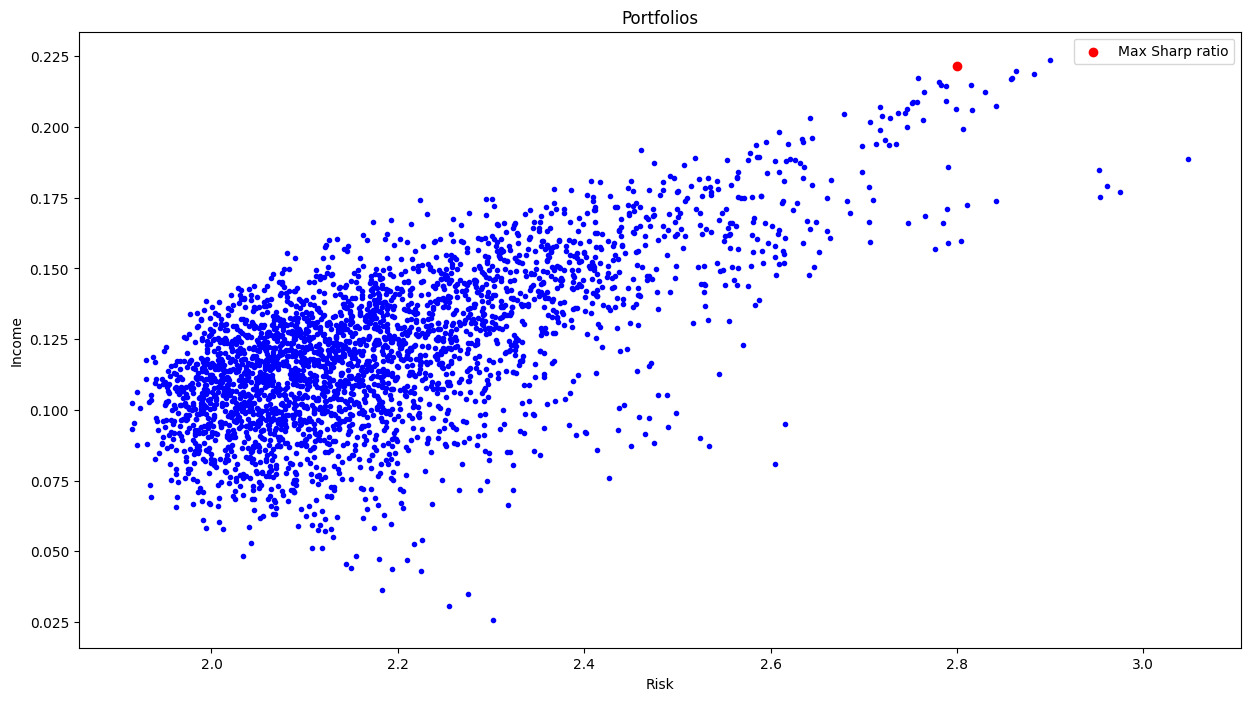

In [26]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

In [27]:
best_port = portfolio[MaxSharpRatio] 
for i in range(len(tickers)):
    print("{} : {}".format(tickers[i], best_port[i]))

GOOG : 0.02529483771440063
AMZN : 0.02303468002541963
AMD : 0.024988668383367465
META : 0.017272956928643564
INTC : 0.03253015735300198
AAPL : 0.12871024772362452
NVDA : 0.6863552682004046
MSFT : 0.06181318367113753


Value at Risk

VaR is a measure of the risk of investment loss. It calculates how much a group of assets would lose (with a specified probability) in a specific time period, such as a day, under typical market conditions.


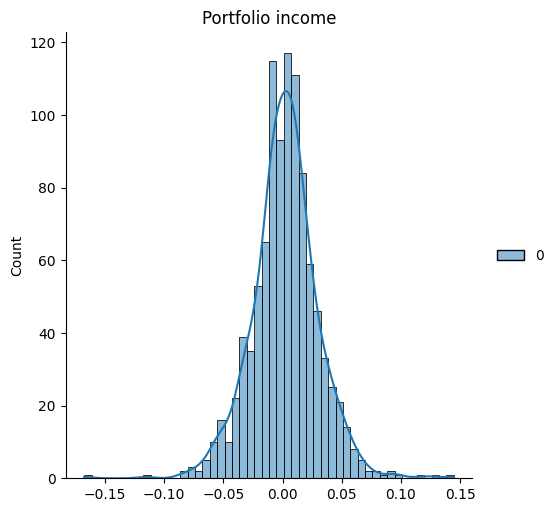

In [28]:
best_portfolio_income = np.matmul(stock_returns, portfolio[MaxSharpRatio].reshape(-1, 1))
sns.displot(best_portfolio_income, bins=50, color='blue', kde=True)
plt.title('Portfolio income')
plt.show()



In [29]:
std_dev = RiskPortfolio(best_port)
mean = IncomePortfolio(best_port)

In [30]:
# VaR for one day
var_90 = norm.ppf(0.1, mean, std_dev)
var_95 = norm.ppf(0.05, mean, std_dev)
var_99 = norm.ppf(0.01, mean, std_dev)

print(tabulate([['90%', var_90],
          ['95%', var_95],
          ['99%', var_99]], headers=['Confidence level', 'Value at Risk']))

Confidence level      Value at Risk
------------------  ---------------
90%                      -0.0336752
95%                      -0.04385
99%                      -0.0629362


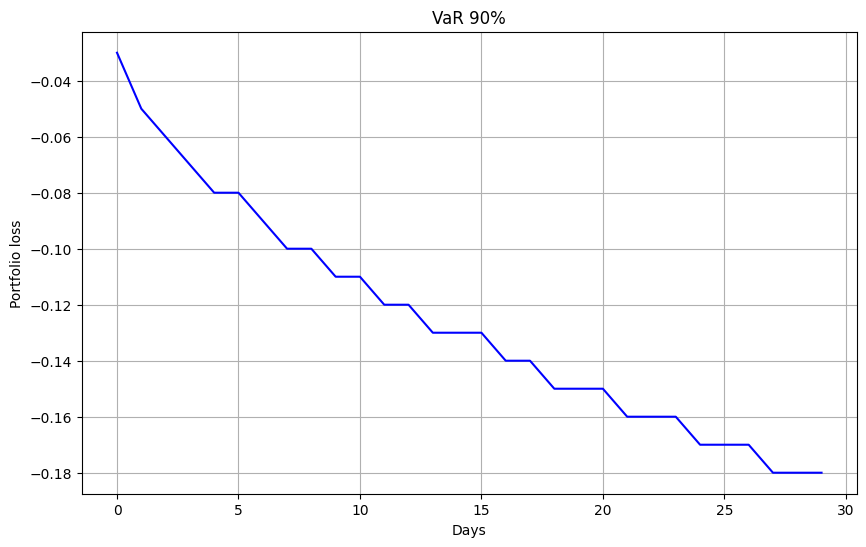

In [31]:
# VaR for month
var_array, days = [], 30

for x in range(1, days+1):
    var_array.append(np.round(var_90 * np.sqrt(x), 2))

plt.figure(figsize=(10, 6))
plt.xlabel('Days')
plt.ylabel('Portfolio loss')
plt.title('VaR 90%')
plt.grid(True)
plt.plot(var_array, 'b')
plt.show()

Hedging portfolio with options

For hedging best portfolio I use put option. I calculate the shares of options, which sould buy on futures market by this formula.

size of option = size of stock / delta

In [36]:
capital = 100000
option_share = []

for i, ticker in enumerate(tickers):
    share = best_port[i] * capital

    delta = options_put[ticker]['Delta'].loc[options_put[ticker].shape[0] // 1.5]
    option_share.append(- share / (delta+0.1))

In [37]:
option_share

[-25294.837714400626,
 2559.408891713292,
 -24988.668383367465,
 -17272.95692864356,
 3614.461928111331,
 14301.13863595828,
 -686355.2682004045,
 -61813.18367113753]